In [232]:
import pandas as pd 
import numpy as np 
import matplotlib as mp
%matplotlib inline


import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [233]:
data = pd.read_csv('netflix_titles.csv')

In [234]:
data.shape

(8807, 12)

In [235]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [236]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Data preprocessing

## Data cleaning

In [237]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [238]:
data.duplicated().sum()
len(data)

8807

In [239]:
nan_counts = data.isnull().sum()
nan_percentage = (nan_counts/len(data))*100
nan_percentage

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

## handling the missing values, by using fillna() 


In [240]:
data['director'] = data['director'].fillna("No director specified")
data['director'].value_counts()  ##used to display the count of record in the dataframe.

director
No director specified             2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [241]:
data['cast'] = data['cast'].fillna("No cast specified")
data['cast'].value_counts()

cast
No cast specified                                                                                                                                                                             825
David Attenborough                                                                                                                                                                             19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                        14
Samuel West                                                                                                                                                                                    10
Jeff Dunham                                                                                                                                                                                     7
                         

In [242]:
data['country'] = data['country'].fillna("No country specified")
data['country'].value_counts()

country
United States                             2818
India                                      972
No country specified                       831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

In [289]:
data['rating'] = data['rating'].astype('category')
data.info()
x = data['rating'].value_counts()

x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   object  
 2   title         8807 non-null   object  
 3   director      8807 non-null   object  
 4   cast          8807 non-null   object  
 5   country       8807 non-null   object  
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8800 non-null   category
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   object  
 11  description   8807 non-null   object  
dtypes: category(1), int64(1), object(10)
memory usage: 766.2+ KB


rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [290]:
def rating_cleaning(rating):
        if 'min' in rating:
            return None
        else:
            return rating

data['rating'] = data['rating'].apply(rating_cleaning)

x = data['rating'].value_counts()
x.info()

<class 'pandas.core.series.Series'>
CategoricalIndex: 14 entries, TV-MA to UR
Series name: count
Non-Null Count  Dtype
--------------  -----
14 non-null     int64
dtypes: int64(1)
memory usage: 794.0 bytes


In [245]:
pie = px.pie(x,values=x.values,names=x.index,title="distrubution of content rating over netflix")
pie.show()

In [246]:
director_list = pd.DataFrame()
director_list = data['director'].str.split(',',expand= True).stack()
director_list = director_list.to_frame()
director_list

,,0
0,0,Kirsten Johnson
1,0,No director specified
2,0,Julien Leclercq
3,0,No director specified
4,0,No director specified
...,...,...
8802,0,David Fincher
8803,0,No director specified
8804,0,Ruben Fleischer
8805,0,Peter Hewitt


In [247]:
director_list.columns = ['director']
director_list

,,director
0,0,Kirsten Johnson
1,0,No director specified
2,0,Julien Leclercq
3,0,No director specified
4,0,No director specified
...,...,...
8802,0,David Fincher
8803,0,No director specified
8804,0,Ruben Fleischer
8805,0,Peter Hewitt


In [248]:
directors = director_list.groupby(by = 'director').value_counts().reset_index(name = 'Total Counts')
directors = directors[directors.director !='No director specified']
directors = directors.sort_values(by = ['Total Counts'],ascending= False)
top_directors = directors.head(10)
top_directors

,director,Total Counts
4021,Rajiv Chilaka,22
4068,Raúl Campos,18
261,Jan Suter,18
4652,Suhas Kadav,16
3235,Marcus Raboy,16
2450,Jay Karas,15
1382,Cathy Garcia-Molina,13
2447,Jay Chapman,12
3306,Martin Scorsese,12
5075,Youssef Chahine,12


In [249]:
bar_chart = px.bar(data_frame= top_directors, x = 'Total Counts', y = 'director', title = 'Top 10 directors')
bar_chart.show()

### Splitting the records data and arraging them in stack for useage

In [250]:
cast_list = pd.DataFrame()
cast_list = data['cast'].str.split(',',expand=True).stack()
cast_list = cast_list.to_frame()
cast_list

0
0    0       No cast specified
1    0              Ama Qamata
     1             Khosi Ngema
     2           Gail Mabalane
     3          Thabang Molaba
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[64951 rows x 1 columns]

In [251]:
cast_list.columns = ['casts']
cast_list

casts
0    0       No cast specified
1    0              Ama Qamata
     1             Khosi Ngema
     2           Gail Mabalane
     3          Thabang Molaba
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[64951 rows x 1 columns]

In [252]:

cast_list = cast_list.groupby(by = 'casts').value_counts().reset_index(name = 'cast_counts')
cast_list = cast_list[cast_list['casts']!= 'No cast specified']
castss = cast_list.sort_values(by = ['cast_counts'],ascending=False)
top_casts = castss.head(10)


In [253]:
top_casts = top_casts.sort_values(by = ['cast_counts'],ascending=False)

In [254]:
bar_casts = px.bar(top_casts,x = 'cast_counts', y = 'casts',title = 'Top 10 casted actors')
bar_casts.show()

### Count plot - Counts of movies and TV shows 

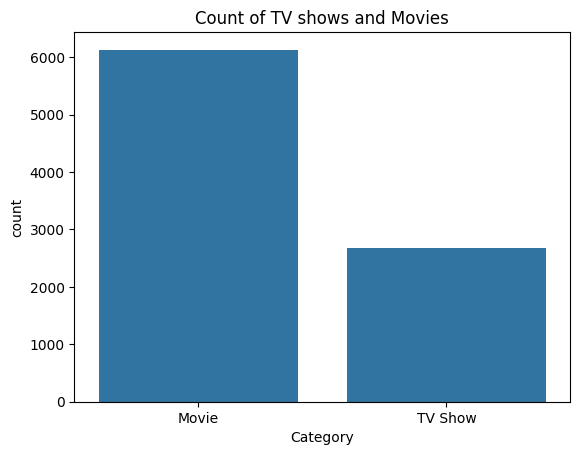

In [255]:
from matplotlib import pyplot as plt


sns.countplot(data = data,x = 'type')
plt.title("Count of TV shows and Movies")
plt.xlabel("Category")
plt.show()

### No of movies released.

In [256]:
movies = data[data.type == 'Movie']
movies = movies.groupby('release_year')[['type']].value_counts().reset_index(name = 'Count of Movies')
movies


,release_year,type,Count of Movies
0,1942,Movie,2
1,1943,Movie,3
2,1944,Movie,3
3,1945,Movie,3
4,1946,Movie,1
...,...,...,...
68,2017,Movie,767
69,2018,Movie,767
70,2019,Movie,633
71,2020,Movie,517


In [257]:
line_graph = px.line(movies, y = 'Count of Movies' ,x = 'release_year', title='No of movies over years')
line_graph.show()

### No of TV shows released 

In [258]:
TV_shows = data[data['type'] == 'TV Show']
TV_shows = data.groupby('release_year')[['release_year']].value_counts().reset_index(name= 'No of TV shows')
TV_shows

,release_year,No of TV shows
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


In [259]:
line_tv_shows = px.line(TV_shows,x = 'release_year', y = 'No of TV shows', title= 'No of TV shows over the years')
line_tv_shows.show()

#### Top 5 movie producting countries 

In [260]:
countries = data[data['country']!= 'No country specified'][['country']]
countries = countries['country'].str.split(',',expand=True).stack()
countries = countries.to_frame()
countries.columns = ['Country']

In [261]:
country_Counts =countries.groupby(by = 'Country').value_counts().reset_index(name = 'country_counts')
country_Counts

,Country,country_counts
0,,7
1,Afghanistan,1
2,Albania,1
3,Algeria,3
4,Angola,1
...,...,...
192,Uruguay,9
193,Venezuela,2
194,Vietnam,7
195,West Germany,1


In [262]:
country_Counts = country_Counts.sort_values(by = ['country_counts'], ascending= False)
top_countries = country_Counts.head(5)
top_countries = top_countries.sort_values(by = 'country_counts', ascending=True)

In [263]:
bar_country = px.bar(top_countries,x = 'country_counts',y='Country',title = 'Top 5 movie producing countries')
bar_country.show()

### Movie Ratings in India

In [269]:
Movie_ratings = data[data['type'] == 'Movie']
Movie_ratings.dropna(subset='rating',axis = 0,inplace=True)
Movie_ratings.rating.isnull().sum()

np.int64(0)

In [317]:
Movie_ratings.rating.value_counts()
Movie_ratings_india = Movie_ratings[Movie_ratings['country'] == 'India']['rating']
top_ratings = Movie_ratings_india.value_counts().head(5)
top_ratings = top_ratings.to_frame()
top_ratings

,count
rating,
TV-14,526
TV-MA,215
TV-PG,124
TV-Y7,10
TV-G,6


In [318]:
bar_ratings_india = px.bar(top_ratings, x= 'count', y = top_ratings.index,title = 'Top ratings for Movies in India')
bar_ratings_india.show()